# Ordinary differential equations

Differential equation appear in all branches og physics, from classical mechanics to quantum physics. We start by looking at several examples of ODEs, some of which have analytical solitions and can be solved exactly, while other examples will require numerical integration methods.

## 10.1 Definitions and examples of differnetial equations

Simply put, a differential equation is any equation which contains the derivative of a function. Differential equations are an essential tool for scientists, and they are used in many scientific areas to describe the change of a physcial quantity as a function of a variable characterizing the system.

## 10.2 Separable differential equations

In summary, in order to solve for the particular solution of an $n^{th}$-order ODE, we need n initial conditions. We can also specify the value of x at two different times, as opposed to knowing the initial conditions of the position and velocity.

## 10.3 Symbolic integration of differential equations using sympy

## Example 10.1: Symbolic solution of ODE dv/dt = a using SymPy

In [2]:
from sympy import Function, symbols, dsolve, Derivative as D

v = Function('v')
t, v0, a = symbols('t, v0, a', real=True)

# use dsolve to obtain the general solution
soln = dsolve(D(v(t), t)-a, v(t), simplify=True).rhs
print('General symbolic solution v(t) = ', soln)

General symbolic solution v(t) =  C1 + a*t


In [4]:
# solve again using dsolve, with initial conditions
initCondits = {v(0): v0}
soln = dsolve(D(v(t), t)-a, v(t), simplify=True, ics=initCondits).rhs
print('\nUsing initial conditions, the solution v(t) = ', soln)


Using initial conditions, the solution v(t) =  a*t + v0


## Example 10.2: Symbolic solutiono of ODE $x^{''}(t)=a$ using SymPy

In [9]:
from sympy import symbols, Function, lambdify, Derivative as D, dsolve
import numpy as np
import matplotlib.pyplot as plt

# define the function x and various symbols
x = Function('x')
a, t, x0, v0 = symbols('a, t, x0, v0', real=True)

# initial conditions for ode are x(0)=x0 and v(0)=v0
initCondits = {x(0): x0, D(x(t), t).subs(t, 0): v0}

# use dsolve to find the solution with given initial conditions
soln = dsolve(D(x(t), t, t) -a, x(t), simplify=True, ics=initCondits).rhs
print('The symbolic solution is x(t) = ', soln)

The symbolic solution is x(t) =  a*t**2/2 + t*v0 + x0


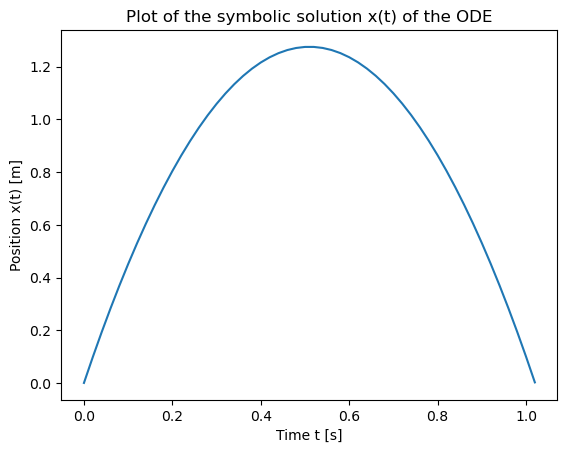

In [13]:
# make a numpy-ready function x(t) from the SymPy results
# using lamdify and subtitute numerical values of a, x0, y0
xsoln = lambdify(t, soln.subs({a:-9.8, v0:5, x0:0}), 'numpy')

# use the lambda function above to evaluate x(t) values from 0 to 1.03 s
xvals = np.arange(0, 1.03, .02)
yvals = xsoln(xvals)

# plot values x(t)
plt.plot(xvals, yvals)
plt.xlabel('Time t [s]')
plt.ylabel('Position x(t) [m]')
plt.title('Plot of the symbolic solution x(t) of the ODE')
plt.show()

## 10.4 General solution of first order linear odes: the integratign factor method

In [14]:
from sympy import symbols, Function, Derivative as D, dsolve
# define function y and various symbols
y = Function('y')
b, x = symbols('b, x', real=True)

# use dsolve to find the solution
soln = dsolve(D(y(x), x) + b*y(x) - 1, y(x), simplify=True).rhs
print('The symbolic solution is y(x) =', soln)

The symbolic solution is y(x) = C1*exp(-b*x) + 1/b


## 10.5 ODES for oscillating systems: Genereal considerations

Oscillating systems are of fundamental importance in physics and engineering systems, but interest in their study extends to almost every branch of science. With the exception of the simple pendulum.

## 10.6 The simple harmonic oscillator

Simple harmonic motion occurs when an object displaced a small distance from a stable equilibrium position, experiences a restoring force toward the quilibrium state.

The SHO is an important equation in physics because it is the generic equation of motion for an object experiencing small amplitude oscillations about a stable equilibrium.

### Example 10.4: The general symbolic solution of the SHO

In [20]:
from sympy import symbols, Function, Derivative as D, dsolve, simplify

# define function x and various symbols
x = Function('x')
k, m, t = symbols('k, m, t', real=True)
x0, v0 = symbols('x0, v0', real=True)
soln = dsolve(m*D(x(t), t, t) + k*x(t), x(t), \
simplify=True).rhs
print('The symbolic solution is:\n', 'x(t) =')
print(soln)

The symbolic solution is:
 x(t) =
C1*exp(-t*sqrt(-k/m)) + C2*exp(t*sqrt(-k/m))


In [23]:
initCondits = {x(0): x0, D(x(t), t).subs(t, 0): v0}
# soln = dsolve(D(x(t), t, t) + (k/m)*x(t), x(t),\
soln = dsolve(D(x(t), t, t) + (k/m)*x(t), x(t),\
simplify=True, ics=initCondits).rhs
print('\nThe solution with the initial conditions x(0)=x0, v(0)=v0 \
is:', '\nx(t) =')
print((soln))
# print(simplify(soln))


The solution with the initial conditions x(0)=x0, v(0)=v0 is: 
x(t) =
(-v0 + x0*sqrt(-k/m))*exp(-t*sqrt(-k/m))/(2*sqrt(-k/m)) + (v0 + x0*sqrt(-k/m))*exp(t*sqrt(-k/m))/(2*sqrt(-k/m))


## 10.7 Numerical integration of the ode of a simple plance pendulum

### Example 10.5: The numerical soluton of the ODE for simple pendulum

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


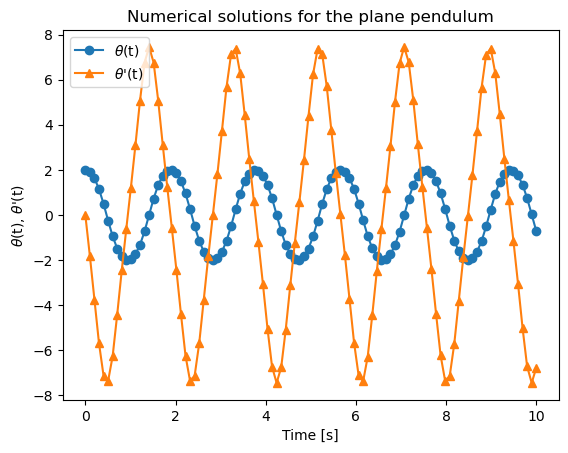

In [24]:
from scipy.integrate import odeint

import numpy as np
import matplotlib.pyplot as plt

L = 0.5  # length of pendulum
g = 9.8  # gravitational acceleration

# function to define the ODE for pendulum
def deriv(y, time):
    return (y[1], - (g/L)*np.sin(y[0]))

# define times t
t = np.linspace(0, 10, 100)

# initial conditions theta(0)=2 rad, theta'(0)=0
yinit = (2, 0)

# solve numerically using scipy odeint() function
y = odeint(deriv, yinit, t)

# Plot angle and angular velocity as functions of time
plt.plot(t, y[:, 0], 'o-', label=r'$\theta$(t)')
plt.plot(t, y[:, 1], '^-', label=r"$\theta$'(t)")

plt.legend(loc='best')
plt.xlabel('Time [s]')
plt.ylabel(r"$\theta$(t), $\theta$'(t)")
plt.title('Numerical solutions for the plane pendulum')
plt.show()

## 10.8 Damped harmonic oscillator

Next, we add a linear resistive force to the simple harmonic oscillator. The resistive force is sometimes called damping and is present, for example, when the oscillator is moving through a fluid such as air.

### 10.8.1 Case 1: overdamped oscillations

### 10.8.2 Case 2: Underdamped oscillations

### 10.8.3 Case 3: Critically damped oscillations

### Example 10.6: The symbolic solution of the damped oscillator

In [26]:
from sympy import symbols, Function, Derivative as D, dsolve
import textwrap

# define function x and various symbols
x = Function('x')
x0,v0 = symbols('x0, v0', real=True)
k, m, gamma, t, omega, C1, C2 = symbols('k, m, gamma, t, \
omega, C1, C2', real=True, positive=True)

# Overdamped and underdamped oscillation
soln = dsolve(D(x(t), t, t) + 2*gamma*D(x(t), t) + omega**2*x(t), x(t), \
simplify=True).rhs

print('\nFor overdamped and underdamped oscillations the \
solution: \nx(t) =')
print(textwrap.fill(str(soln), 63))


For overdamped and underdamped oscillations the solution: 
x(t) =
C1*exp(t*(-gamma + sqrt(gamma - omega)*sqrt(gamma + omega))) +
C2*exp(-t*(gamma + sqrt(gamma - omega)*sqrt(gamma + omega)))


In [29]:
# critically damped oscillation: gamma=omega
soln = dsolve(D(x(t), t, t) + 2*omega*D(x(t), t) + omega**2*x(t), x(t), \
simplify=True).rhs
print('\nFor criticaly damped oscillations, the symbolic \
solution is:\nx(t) =\n', str(soln))


For criticaly damped oscillations, the symbolic solution is:
x(t) =
 (C1 + C2*t)*exp(-omega*t)


### Example 10.7: Graphing the three types of damped oscillations

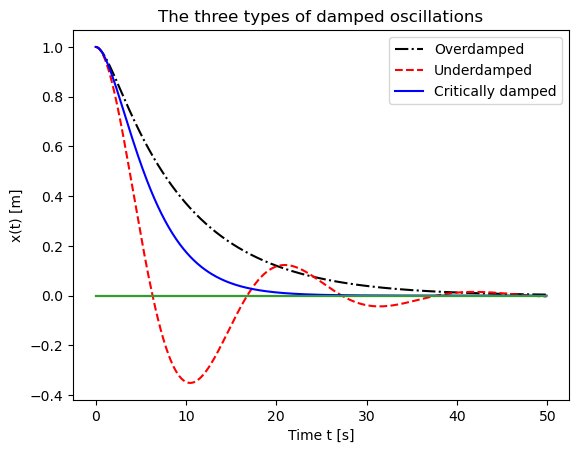

In [32]:
from sympy import symbols, Function, Derivative as D, dsolve, lambdify
import numpy as np
import matplotlib.pyplot as plt

x = Function('x')
t = symbols('t', real=True, positive=True)

# function to plot the three solutions x(t) for given k, m, b
# add different markers and labels
def plotx(k, m, b, labl, mrker):
    # solve differential equation with initial conditions
    soln = dsolve(m*D(x(t), t, t) + b*D(x(t), t) + k*x(t),
                 x(t), simplify=True, ics=initCondits).rhs

    # lambdify the solution to get a function x(t)
    xsoln = lambdify(t, soln, 'numpy')

    # evaluate x(t) values from t=0 to t=50 s
    xvals = np.arange(0, 50, .1)
    yvals = xsoln(xvals)

    # plot x(t) using different markers and labels
    plt.plot(xvals, yvals, mrker, label=labl);
    plt.plot(xvals, [0]*xvals)

# initial conditions x(0)=1 and v(0)=0
initCondits = {x(0):1, D(x(t), t).subs(t, 0):0}

# plot the solution x(t) for overdamped motion
k, m, b = .1, 1, 1
labl = 'Overdamped'
plotx(k, m, b, labl, 'k-.')

# plot the solution x(t) for underdamped motion
b = .2
labl = 'Underdamped'
plotx(k, m, b, labl, 'r--')

# plot the solution x(t) for critically damped motion
b = 0.632
labl = 'Critically damped'
plotx(k, m, b, labl, 'b')

plt.title('The three types of damped oscillations')
plt.ylabel('x(t) [m]')
plt.xlabel('Time t [s]')
leg = plt.legend()
plt.show()

## 10.9 Forced harmonic oscillator

You might be wondering why we limit ourselves to studying driving forces in the form of cosine functions. Clearly not all driving forces in nature are in the form of cosine or sine functions. As we have seen in our discussion of Fourier series, any periodic force (under certain conditions, which are often met in physical problems) can be approximated using a series of sines and cosines. Therefore, the case of cosine or sine driving forces is applicable widely and for many physical systems.

Many physical systems exhibit both a transient and steady state behavior. Physicists are often (but not always!) more interested in the steady state behavior of the system, because that is the system's long term behavior.

### 10.8: The symbolic solution of the ODE for a driven oscillation

The analytical solution is complicated!
x(t) = 
C1*exp(t*(-gm + sqrt(gm - wo)*sqrt(gm + wo))) +
C2*exp(-t*(gm + sqrt(gm - wo)*sqrt(gm + wo))) +
2*F*gm*w*sin(t*w)/(4*gm**2*w**2 + w**4 - 2*w**2*wo**2 +
wo**4) - F*w**2*cos(t*w)/(4*gm**2*w**2 + w**4 - 2*w**2*wo**2
+ wo**4) + F*wo**2*cos(t*w)/(4*gm**2*w**2 + w**4 -
2*w**2*wo**2 + wo**4)


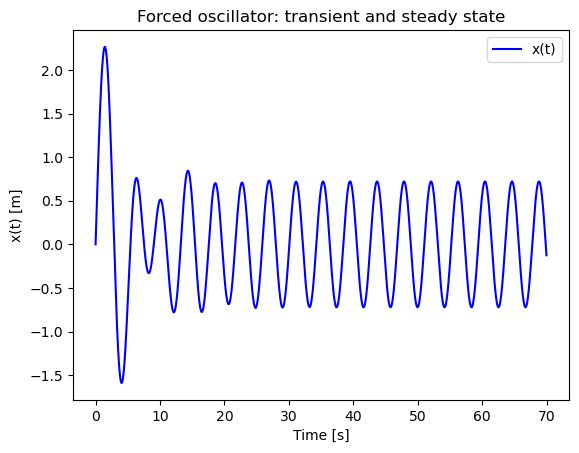

In [41]:
from sympy import symbols, Function, solve, Derivative as D,\
dsolve, lambdify, cos

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import textwrap

x = Function('x')
C1, C2 = symbols('C1, C2')
t, F, w, wo, gm = symbols('t, F, w, wo, gm ', real=True,\
positive=True)

# initial conditions x(0)=1 and v(0)=0
soln = dsolve(D(x(t), t, t) + 2*gm*D(x(t), t) + wo**2*x(t)-F*cos(w*t),
              x(t),simplify=True).rhs
print('The analytical solution is complicated!')
print('x(t) = ')
print(textwrap.fill(str(soln), 60))
# substitute numerical values for the parameters
u1 = soln.subs({F:1, w:1.5, wo:1, gm:.2, t:0})

u2 = soln.subs({F:1, w:1.5, wo:1, gm:.2, t:1})

C1C2 = solve([u1, u2-2], (C1, C2))

u = soln.subs({F:1, w:1.5, wo:1, gm:.2}).subs(C1C2)

xsoln = lambdify(t, u, 'numpy')

# evaluate x(t) values from t=0 to t=70 s
xvals = np.arange(0, 70, .02)
yvals = xsoln(xvals)

# plot x(t) using different markers and labels
plt.plot(xvals, yvals, 'b', label='x(t)')
plt.xlabel('Time [s]')
plt.ylabel('x(t) [m]')

plt.title('Forced oscillator: transient and steady state')
leg = plt.legend()
plt.show()

## Example 10.9: The numerical solution of ODE for driven oscillation

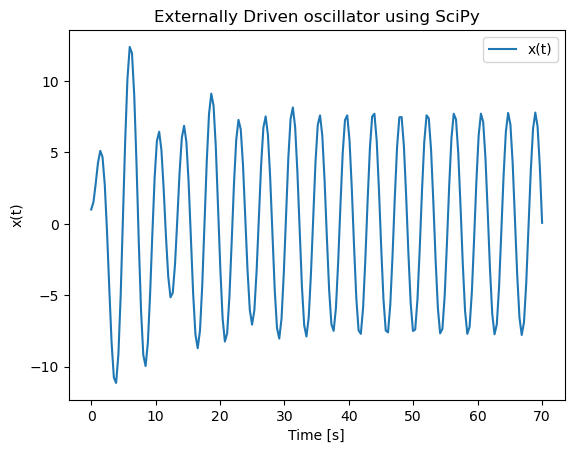

In [42]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# SI values of mass, spring constant, force amplitude
b, m, k, Fo, om = 0.2, 1, 1, 10, 1.5

def deriv(y, time):
    return (y[1], -(b/m)*y[1] - (k/m)*y[0]+Fo/m*np.cos(om*time))

t = np.linspace(0, 70, 200)
yinit = (1, 0)

soln = odeint(deriv, yinit, t)

plt.plot(t, soln[:, 0], '-', label=r'x(t)')
plt.ylabel('x(t)')
plt.xlabel('Time [s]')
plt.title('Externally Driven oscillator using SciPy')
leg = plt.legend()
plt.show()

### Example 10.10: The amplitude A as a function of the external frequency

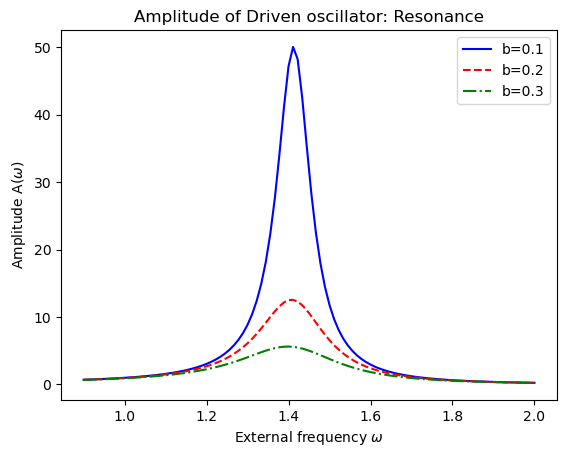

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# SI values of mass, spring constant, force amplitude
m, k, Fo = 1, 1, 1

# natural frequency (undamped oscillation)
omega0 = np.sqrt(k/m)

# function to evaluate the amplitude for different (omega, b) values
def ampl(omega, b):
    gamma = b/(2*m)
    return (Fo/m)/((omega0*2-omega**2)**2+4*(gamma**2)*(omega**2))

omega = np.linspace (0.9,2,100)

# 3 plots for different values of b
plt.plot(omega, ampl(omega, .1), 'b', label=r'b=0.1')
plt.plot(omega, ampl(omega, .2), 'r--', label=r'b=0.2')
plt.plot(omega, ampl(omega, .3), 'g-.', label=r'b=0.3')

plt.ylabel(r'Amplitude A($\omega$)')
plt.xlabel(r'External frequency $\omega$')
plt.title('Amplitude of Driven oscillator: Resonance')
leg = plt.legend()
plt.show()

## 10.10 The principle of linear superposition

THe fact that linear superposition holds, tells us that the steady state behavior of the driven system is the sum of the effects of each drive term.

## Example 10.11: The principle of linear superposition

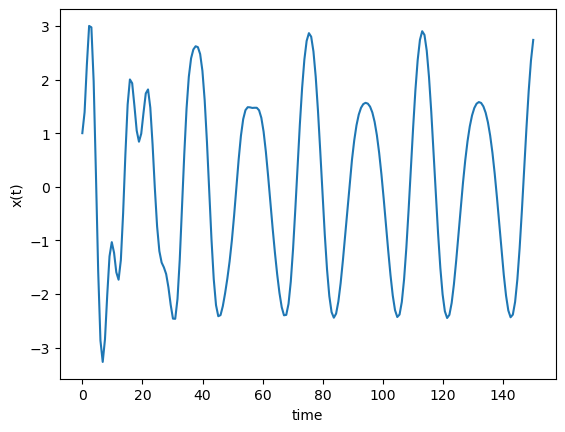

In [50]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

m, gm, omega0, F1, F2 = 1.0, 0.1, 1.0, 0.5, 2.0
om1 = omega0/2
om2 = omega0/3

def deriv(y, t):
    return (y[1], -gm*y[1] - omega0**2*y[0] + \
            F1/m*np.cos(om1*t) + F2/m*np.cos(om2*t))
time = np.linspace(0, 150, 200)
yint = (1,0)
soln = odeint(deriv, yint, time)

plt.plot(time, soln[:, 0])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## 10.11 Electrical cricuits

## 10.12 Phase space

Phase space diagrams are a very useful concept in physics and other disciplines. A phase space diagram usually plots the position x(t) of a particple on the x-aixs and its corresponding speed $v(t)$ on the y-axis.

Phase space diagrams can tell us something about the motion of the system. The curve in a phase diagram is sometimes referred to as a trajectoryin phase space. An image of all possible trajectories in a phase space is sometimes called a phase portrait or phase diagram.

### Example 10.12: Phase space diagrams of damped oscillators

---------------------------- CODE OUTPUT ----------------------------- 



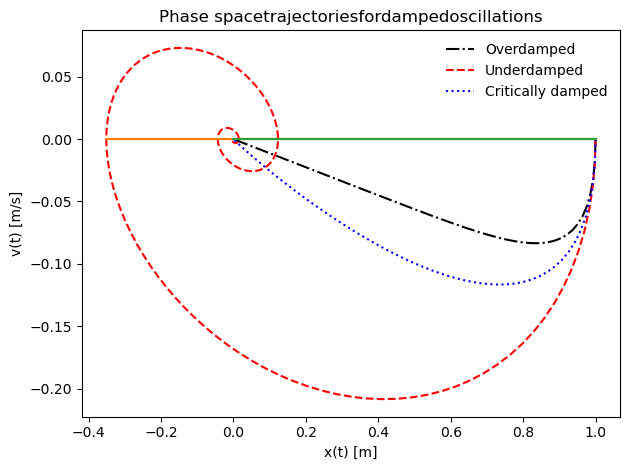

In [53]:
from sympy import symbols,Function,Derivative as D,dsolve,\
lambdify, diff
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')
x =Function('x')
t =symbols('t',real=True,positive=True)
# functiontoplotthethreephasespacesforgivenk,m,b
def plotx(k,m,b,labl,mrker):
    # solvedifferentialequationwithinitialconditions
    soln =dsolve(m*D(x(t),t,t)+b*D(x(t),t)+k*x(t),
    x(t),simplify=True,ics=initCondits).rhs
    # lambdifythesolutiontogetafunctionx(t),x'(t)
    xsoln =lambdify(t,soln,'numpy')
    dersoln =lambdify(t,diff(soln,t),'numpy')
    # evaluatex(t),x'(t) valuesfromt=0tot=50s
    tvals =np.arange(0,50,.2)
    xvals =xsoln(tvals)
    yvals =dersoln(tvals)
    # plotx(t)usingdifferentmarkersabndlabels
    plt.plot(xvals,yvals, mrker,label=labl);
    plt.plot(xvals,[0]*xvals)
    # initialconditionsx(0)=1andv(0)=0
initCondits ={x(0):1,D(x(t),t).subs(t,0):0}
k,m,b=.1,1,1 # trajectoryforoverdampedmotion
labl = 'Overdamped'
plotx(k,m,b,labl,'k-.')
b =.2#trajectoryforunderdampedmotion
labl='Underdamped'
plotx(k,m,b,labl,'r--')
b =0.63
labl = 'Critically damped' # trajectoryforCriticallydamped
plotx(k,m,b,labl,'b:')
plt.title('Phase spacetrajectoriesfordampedoscillations');
plt.xlabel('x(t) [m]')
plt.ylabel('v(t) [m/s]')
leg =plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.show()

It is often the case in nonlinear systems that the equations of motion cannot be solved analytically. Therefore the phase space diagram may be the only tool available in getting information about the behavior of the system.

## 10.13 Systems of differential equations

### Example 10.13: The symbolic solution of a system of ODEs

In [67]:
from sympy import Function, Eq, Derivative as D, symbols, lambdify
from sympy.solvers.ode.systems import dsolve_system

import numpy as np
import matplotlib.pyplot as plt

k, m, t, om, x0, v0 = symbols('k, m, t, om, x0, v0', real=True,\
positive=True)

x1, x2 = symbols('x1, x2', cls=Function)
# function to plot x1, x2 etc
def plotx(y, ttle):
    plt.plot(xvals, y, 'b')
    plt.title(ttle)

# Newton's law for the two masses
eq1 = Eq(D(x1(t), t, t), -om**2*x1(t)-om**2*(x1(t)-x2(t)))
eq2 = Eq(D(x2(t), t, t), -om**2*x2(t)-om**2*(x2(t)-x1(t)))

# initial conditions x1(0)=0, v1(0)=0, x2(0)=0 and v2(0)=1
initCondits = {x1(0): 0, D(x1(t), t).subs(t, 0): 0, \
               x2(0): 0, D(x2(t), t).subs(t, 0):1}

# solve the system of two differential equations symbolically
soln = dsolve_system((eq1, eq2), [x1(t), x2(t)], t, initCondits)

# extract the solutions x1(t) and x2(t), print x1, x2, x1+x2, x1-x2
X1 = soln[0][0].rhs
X2 = soln[0][1].rhs

print("X1(t) = ", X1)
print("X2(t) = ", X2)
print('\nX1(t)+X2(t) = ', X1+X2)
print('\nX1(t)-X2(t) = ', X1-X2)

X1(t) =  sin(om*t)/(2*om) - sqrt(3)*sin(sqrt(3)*om*t)/(6*om)
X2(t) =  sin(om*t)/(2*om) + sqrt(3)*sin(sqrt(3)*om*t)/(6*om)

X1(t)+X2(t) =  sin(om*t)/om

X1(t)-X2(t) =  -sqrt(3)*sin(sqrt(3)*om*t)/(3*om)


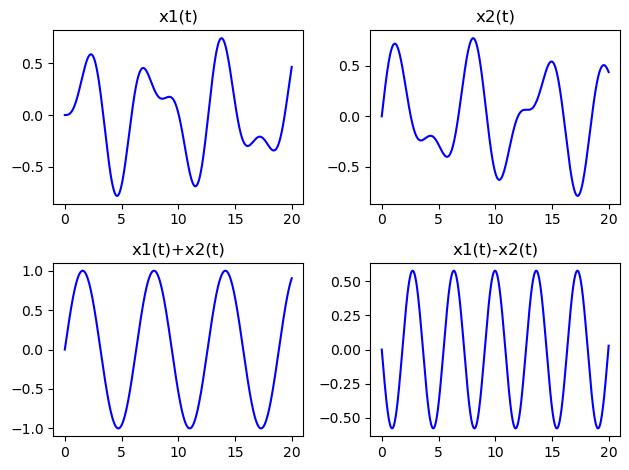

In [68]:
# make x1(t) and x2(t) functions using lambdify, and insert omega=om=1
x1soln = lambdify(t, X1.subs(om, 1), 'numpy')
x2soln = lambdify(t, X2.subs(om, 1), 'numpy')

# print(x1soln)
# print(x2soln)

# evaluate x(t) values from t=0 to t=20 s
xvals = np.arange(0, 20, .02)

# create 4 plot panels for x1, x2, x1+x2 and x1-x2
plt.subplot(2,2,1)
plotx(x1soln(xvals), 'x1(t)')
plt.subplot(2,2,2)
plotx(x2soln(xvals), 'x2(t)')
plt.subplot(2,2,3)
plotx(x1soln(xvals) + x2soln(xvals), 'x1(t)+x2(t)')
plt.subplot(2,2,4)
plotx(x1soln(xvals) - x2soln(xvals), 'x1(t)-x2(t)')
plt.tight_layout()
plt.show()

### Example 10.14: The numerical solution of system of ODEs

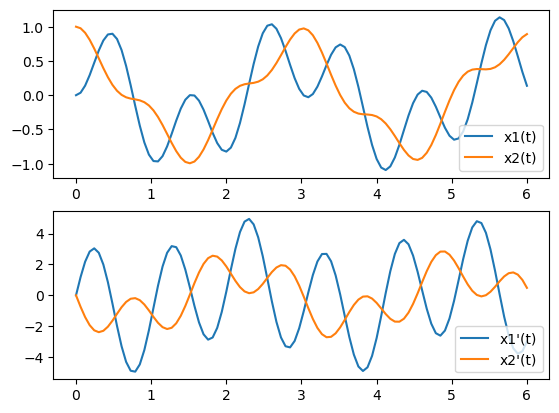

In [70]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# function defines the differential equations
# Y[0] = x1, Y[1]=x1', Y[2]=x2, Y[3]=x2'
def deriv(Y, t):
    return np.array([Y[1], (-k1 * Y[0] + k2 * (Y[2] - Y[0])) / m1,
                     Y[3], (-k3 * Y[2] + k2 * (Y[0] - Y[2])) / m2])
# t = array of times to be evaluated
t = np.linspace(0, 6, 100)

# spring constants and masses
k1, k2, k3 = 10, 20, 5
m1, m2 = 1, 2

# yinit = initial conditions [x1(0), x1'(0), x2(0), x2'(0)
yinit = np.array([0,0,1,0])

# solve the odes using odeint
Y = odeint(deriv, yinit, t)

# plot x1(t), x2(t)
plt.subplot(2, 1, 1)
plt.plot(t, Y[:,0], label='x1(t)')
plt.plot(t, Y[:,2], label='x2(t)')
plt.legend(loc='lower right')

# plot x1'(t), x2'(t)
plt.subplot(2, 1, 2)
plt.plot(t, Y[:, 1], label="x1'(t)")
plt.plot(t, Y[:, 3], label="x2'(t)")

plt.legend(loc='lower right')
plt.show()

## 10.14 The legender equation

An important equation in physics and engineering that arises when working with problems in spherical coordinates is the Legendre equation.

Series solutions are useful when solving an ODE and are often applicable to problems in science.

One reason is that power series solutions can given scaling laws for the function y(x), something that might not be obvious from a closed form solutoin or graph given by a computer.

### Example 10.15: Legendre polynomials

In [71]:
# Evaluate and plot the Legendre polynomials in SciPy
import numpy as np
from scipy.special import eval_legendre
from sympy import legendre, Symbol
import matplotlib.pyplot as plt

In [72]:
x = Symbol('x')
for l in range(0, 6):
    print('P_'+str(l)+' =', legendre(l,x))
l = 6
lhs = l*legendre(l,x)
print('\nThe left hand side = ', lhs.expand())

P_0 = 1
P_1 = x
P_2 = 3*x**2/2 - 1/2
P_3 = 5*x**3/2 - 3*x/2
P_4 = 35*x**4/8 - 15*x**2/4 + 3/8
P_5 = 63*x**5/8 - 35*x**3/4 + 15*x/8

The left hand side =  693*x**6/8 - 945*x**4/8 + 315*x**2/8 - 15/8


In [73]:
rhs = (2*l-1) * x * legendre(l-1,x)-(l-1)*legendre(l-2,x)
print('\nThe right hand side = ', rhs.expand())


The right hand side =  693*x**6/8 - 945*x**4/8 + 315*x**2/8 - 15/8


In [74]:
print('\nThe identity is ', lhs.expand() == rhs.expand())


The identity is  True


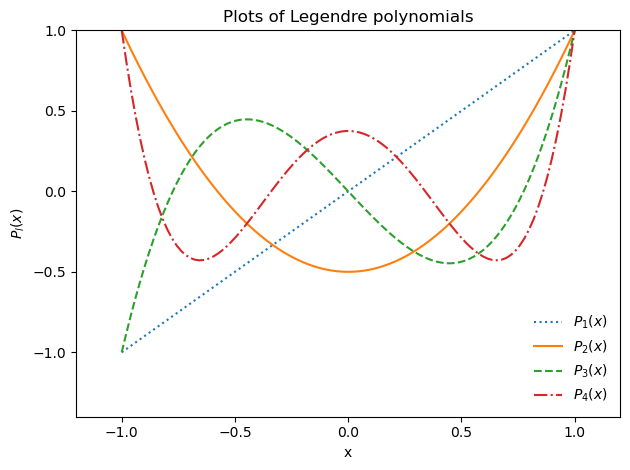

In [76]:
xc = np.linspace(-1, 1, 100)  # x-values between -1 and +1
s = ['.',':','-','--','-.']
for j in range(1, 5):
    plt.plot(xc, eval_legendre(j, xc), str(s[j]), label=r'$P_{}(x)$'.format(j))

plt.title("Plots of Legendre polynomials")
plt.xlabel("x")
plt.ylabel(r'$P_l(x)$')
plt.ylim(-1.4,1);
plt.xlim(-1.2,1.2)
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.show()

### 10.14.1 Associated Legendre functions

In quantum mechanics, the associated Legendre functions are often combined with an exponential to form a new function called spherical harmoncis, $Y^m_l(\theta, \phi)$

Spherical harmonics are an important part of the wave function of the electron in a Hydrogen atom.

### Example 10.16: Associated Legendre functions

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import assoc_legendre, symbols
from scipy.special import lpmv

x = symbols('x')

print('\nl=0')
l = 0
m = [0]
for i in range(len(m)):
    fn = assoc_legendre(l, m[i], x)
    print('P(0, ', m[i], ') = ', fn)
    
print('\nl = 1')
l = 1
m = [-1, 0, 1]
for i in range(len(m)):
    fn = assoc_legendre(l, m[i], x)
    print('P(0, ', m[i], ') = ', fn)

print('\nl = 2')
l = 2
m = [-2, -1, 0, 1, 2]
for i in range(len(m)):
    fn = assoc_legendre(l, m[l], x)
    print('P(0, ', m[i], ') = ', fn)


l=0
P(0,  0 ) =  1

l = 1
P(0,  -1 ) =  sqrt(1 - x**2)/2
P(0,  0 ) =  x
P(0,  1 ) =  -sqrt(1 - x**2)

l = 2
P(0,  -2 ) =  3*x**2/2 - 1/2
P(0,  -1 ) =  3*x**2/2 - 1/2
P(0,  0 ) =  3*x**2/2 - 1/2
P(0,  1 ) =  3*x**2/2 - 1/2
P(0,  2 ) =  3*x**2/2 - 1/2


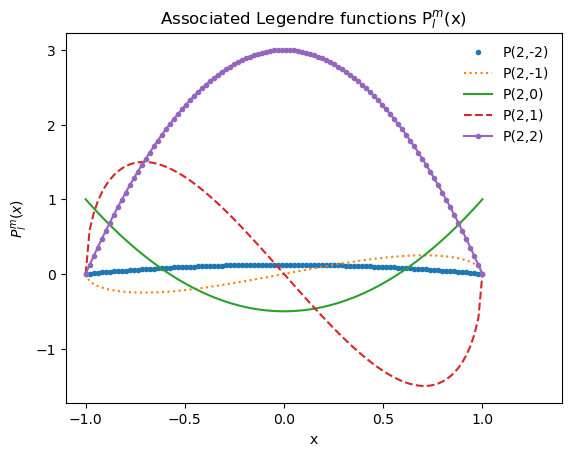

In [83]:
xc = np.linspace(-1, 1, 100)  # x-values between -1 and +1

# define different markers for line plots
s = ['.', ':', '-', '--', '.-']

for j in range(0, 5):
    plt.plot(xc, lpmv(m[j], l, xc), str(s[j]), label='P(2,'+str(m[j])+')')

plt.title(r"Associated Legendre functions P$_l^m$(x)")
plt.xlabel("x")
plt.ylabel(r'$P_l^m(x)$')
plt.xlim(-1.1, 1.4);

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()

### Example 10.17: Polar plots of associated Legendre polynomials

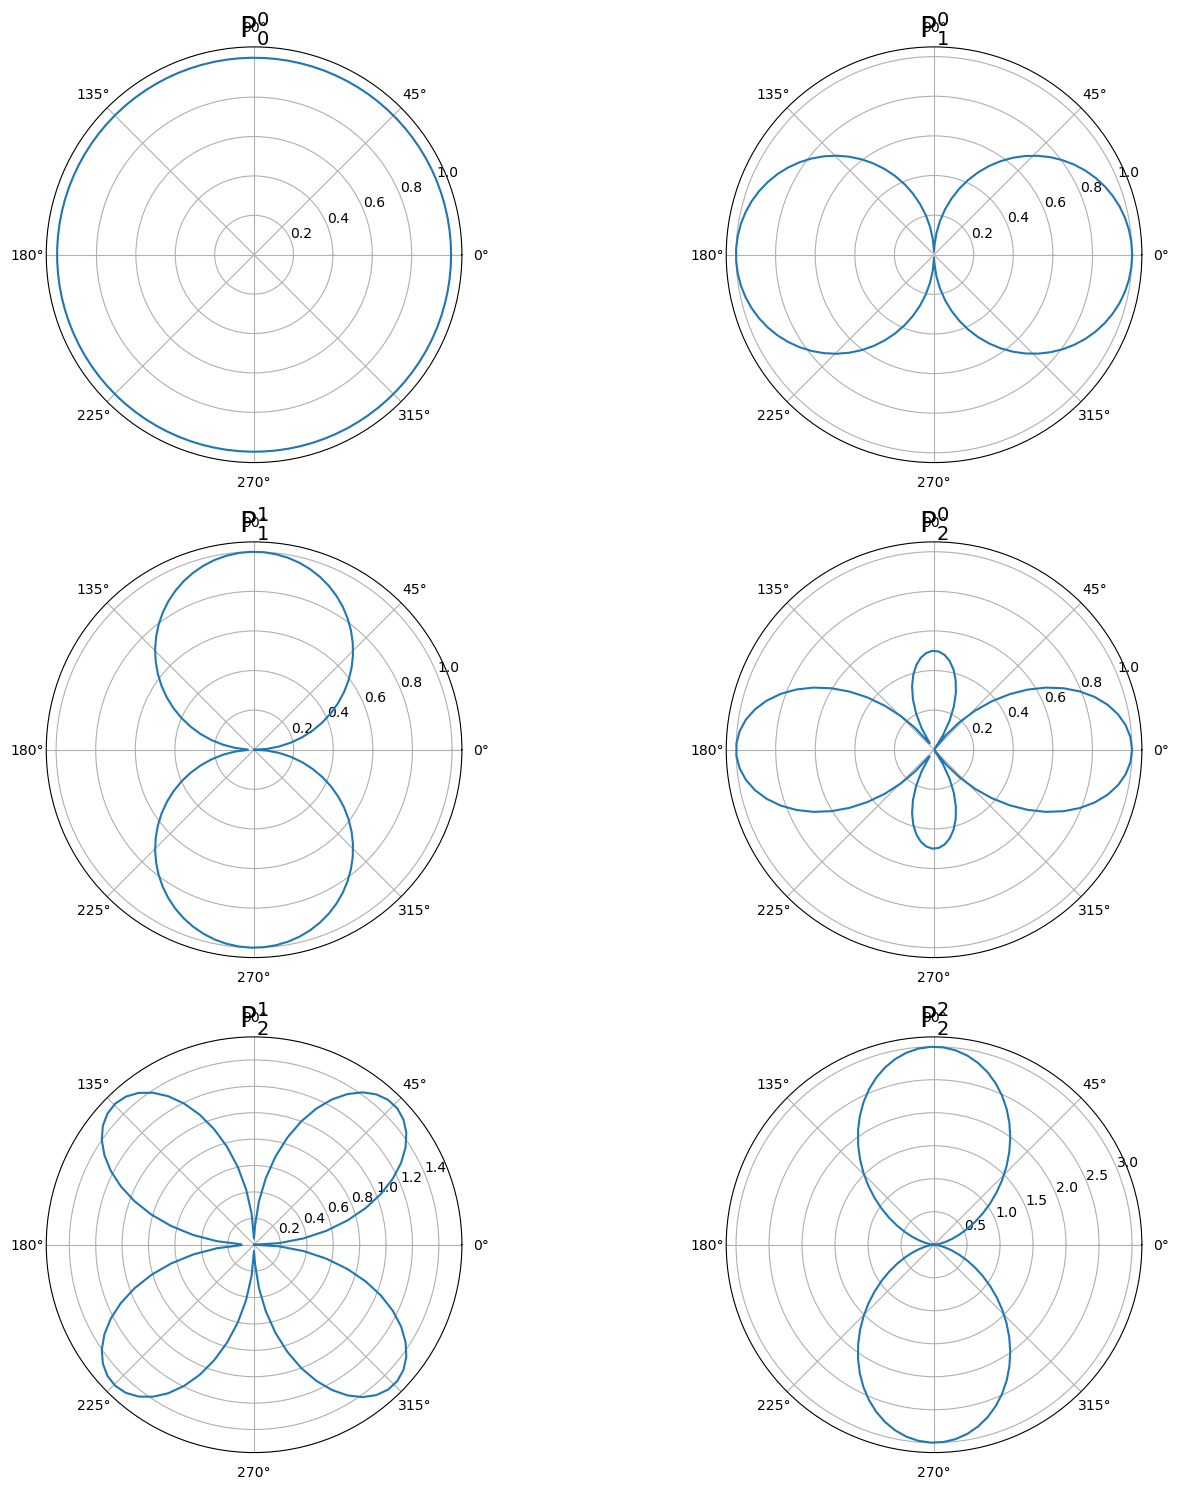

In [84]:
from sympy import symbols, lambdify, cos
from sympy.functions.special.polynomials import assoc_legendre
import numpy as np

import matplotlib.pyplot as plt
from scipy.special import lpmv

theta = np.linspace(0, 2*np.pi, 100)
p00 = abs(lpmv(0,0,np.cos(theta)))
p10 = abs(lpmv(0,1,np.cos(theta)))
p11 = abs(lpmv(1,1,np.cos(theta)))
p20 = abs(lpmv(0,2,np.cos(theta)))
p21 = abs(lpmv(1,2,np.cos(theta)))
p22 = abs(lpmv(2,2,np.cos(theta)))

fig, axs = plt.subplots(3, 2, subplot_kw=dict(projection='polar'), figsize=(15, 15))
axs[0,0].plot(theta,p00)
axs[0,0].set_title('P$_0^0$', fontsize=20)

axs[0,1].plot(theta,p10)
axs[0,1].set_title('P$_1^0$', fontsize=20)

axs[1,0].plot(theta,p11)
axs[1,0].set_title('P$_1^1$', fontsize=20)

axs[1,1].plot(theta,p20)
axs[1,1].set_title('P$_2^0$', fontsize=20)

axs[2,0].plot(theta,p21)
axs[2,0].set_title('P$_2^1$', fontsize=20)

axs[2,1].plot(theta,p22)
axs[2,1].set_title('P$_2^2$', fontsize=20)
fig.tight_layout()
plt.show()

## 10.15 The Bessel equation

Another important ODE in physics which arises when working in cylindrical coordinates is Bessel's equation.

In [88]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from sympy import dsolve, Symbol, symbols, Function, diff

y = Function('y')
x, K = symbols('x, K')
p = Symbol('p', positive=True)

# The general form of Bessel ODE
ode = x**2*y(x).diff(x,x) + x*y(x).diff(x) + (K**2*x**2-p**2)*y(x)
soln = dsolve(ode)

print('The general solution of the Bessel ODE is: \n')
print(soln)

The general solution of the Bessel ODE is: 

Eq(y(x), C1*besselj(p, K*x) + C2*bessely(p, K*x))


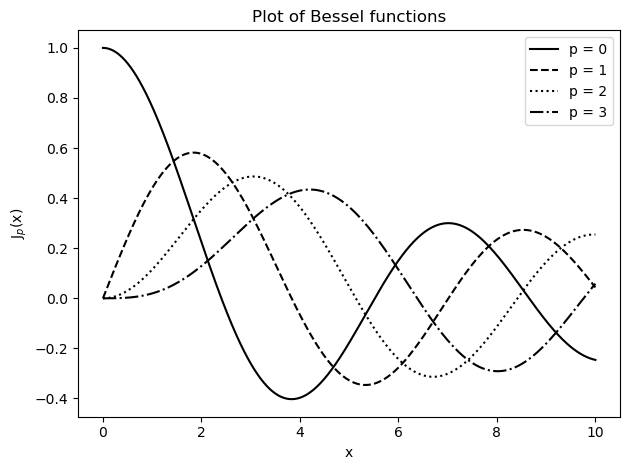

In [89]:
# plot the Bessel functions for p=0,1,2,3
xs = np.linspace(0, 10, 1000)

plt.plot(xs, jv(0, xs), 'k', label = 'p = 0')
plt.plot(xs, jv(1, xs), 'k--', label = 'p = 1')
plt.plot(xs, jv(2, xs), 'k:', label = 'p = 2')
plt.plot(xs, jv(3, xs), 'k-.', label = 'p = 3')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'J$_p$(x)')
plt.title('Plot of Bessel functions')
plt.tight_layout()
plt.show()

### Example 10.19: Properties of the Bessel functions

In [96]:
from sympy import besselj, simplify, symbols, diff
x, p = symbols('x, p')
print('J(0,x)+J(2,x) = ', ((besselj(0, x) + besselj(2,x)).simplify()))
print("J'(0,x) = ", (diff(besselj(0, x)).simplify()))
print("J'(p,x) = ", (diff(besselj(p,x), x).simplify()))
print(besselj(0, x) - besselj(2, x) == 2*diff(besselj(1, x)))

J(0,x)+J(2,x) =  2*besselj(1, x)/x
J'(0,x) =  -besselj(1, x)
J'(p,x) =  besselj(p - 1, x)/2 - besselj(p + 1, x)/2
True


### Example 10.20: Zeros of the Bessel functions

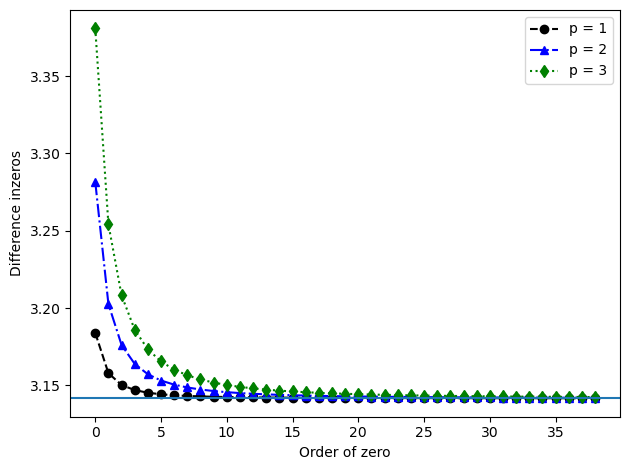

In [109]:
from scipy.special import jn_zeros
import numpy as np
import matplotlib.pyplot as plt

zeros_1 = jn_zeros(1, 40)
zeros_2 = jn_zeros(2, 40)
zeros_3 = jn_zeros(3, 40)

diff_zeros_1 = np.diff(zeros_1)
diff_zeros_2 = np.diff(zeros_2)
diff_zeros_3 = np.diff(zeros_3)

plt.plot(range(0,39),diff_zeros_1, 'ko--', label='p = 1')
plt.plot(range(0,39),diff_zeros_2, 'b^-.', label='p = 2')
plt.plot(range(0,39),diff_zeros_3, 'gd:', label='p = 3')
plt.legend()
plt.ylabel('Difference inzeros')
plt.xlabel('Order of zero')
plt.axhline(y=np.pi)
plt.tight_layout()
plt.show()